## PCA challenge ;)

1. Dimensionality reduction algorithms are one of the possible ways to reduce the computation time required to build a model?

a) True

b) False

In [0]:
# True

2. PCA works better if there is?

a) A linear structure in the data

b) If the data lies on a curved surface and not on a flat surface

c) If features are normalized

In [0]:
# C

3. What happens when you get features in lower dimensions using PCA?  (Select 2 answers)

a) The features will still have interpretability

b) The features will lose interpretability

c) The features must carry all information present in data

d) The features may not carry all information present in data

In [0]:
# A, D

Load the dataset and type your code, later try to answer:


4. How many principal components can we consider? 

5. Consider the necessary number of components to explain at least a 95% of the variance.

6. Calculate the new values for this decomposition and plot them. 


7. Consider the necessary number of components to explain at least a 85% of the variance.

8. Calculate the new values for this decomposition and plot them. 

In [0]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Dataset preparation

Loading and analyzing the iris flowers dataset.

In [6]:
dataset = pd.read_csv('https://raw.githubusercontent.com/Giffy/AI_Intro-to-Machine-Learning/master/Session-5/Datasets/dataset.csv.zip',index_col=0, header=None).T
dataset = dataset.rename(columns={np.nan: 'id'})
dataset = dataset.set_index('id')
dataset

,Feature00001,Feature00002,Feature00003,Feature00004,Feature00005,Feature00006,Feature00007,Feature00008,Feature00009,Feature00010,Feature00011,Feature00012,Feature00013,Feature00014,Feature00015,Feature00016,Feature00017,Feature00018,Feature00019,Feature00020,Feature00021,Feature00022,Feature00023,Feature00024,Feature00025,Feature00026,Feature00027,Feature00028,Feature00029,Feature00030,Feature00031,Feature00032,Feature00033,Feature00034,Feature00035,Feature00036,Feature00037,Feature00038,Feature00039,Feature00040,...,Feature24651,Feature24652,Feature24653,Feature24654,Feature24655,Feature24656,Feature24657,Feature24658,Feature24659,Feature24660,Feature24661,Feature24662,Feature24663,Feature24664,Feature24665,Feature24666,Feature24667,Feature24668,Feature24669,Feature24670,Feature24671,Feature24672,Feature24673,Feature24674,Feature24675,Feature24676,Feature24677,Feature24678,Feature24679,Feature24680,Feature24681,Feature24682,Feature24683,Feature24684,Feature24685,Feature24686,Feature24687,Feature24688,Feature24689,Feature24690
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Observation1,2,4,0,0,19,7,0,4,7,86,22,276,298,30,0,89,0,26,30,227,185,93,0,915,738,0,1,803,0,3398,38,351,15,303,41,228,70,39,85,146,...,0,0,0,28,14,0,0,0,0,0,1,14,0,0,68,0,0,1,0,0,20,0,181,0,9,0,2,483,5,0,0,0,0,0,0,0,4,134,0,0
Observation2,4,1,1,0,10,5,0,1,5,53,21,224,282,34,0,53,0,25,22,212,158,81,0,683,575,0,2,617,0,2740,30,352,18,279,36,234,52,40,68,130,...,0,0,0,29,11,0,0,0,0,0,1,8,0,0,49,0,0,0,0,0,9,0,157,3,12,0,2,336,1,0,0,0,0,0,0,0,4,118,0,0
Observation3,18,3,4,0,19,1,2,12,2,86,58,209,327,57,0,66,0,60,26,229,265,53,0,1140,480,0,4,283,0,2078,31,373,142,185,71,334,45,69,151,169,...,1,0,1,40,8,0,0,0,0,0,5,11,0,0,81,0,0,0,0,0,25,0,336,1,9,0,0,296,5,0,0,4,0,0,0,0,3,98,0,0
Observation4,24,1,2,0,13,0,1,18,1,78,49,280,297,63,0,52,0,88,28,258,354,75,0,1210,490,0,6,344,0,1776,34,291,133,219,81,312,62,44,176,191,...,1,0,0,24,8,0,0,0,0,0,5,9,0,0,75,0,0,0,0,0,41,0,374,0,20,0,0,289,6,0,0,2,0,0,0,0,1,80,0,0
Observation5,7,5,0,0,50,31,0,21,30,257,85,903,1228,129,0,191,0,88,132,748,524,346,1,3030,2398,0,9,3170,0,13572,139,1070,55,1073,150,677,236,125,305,330,...,0,0,0,55,34,0,0,0,0,0,10,46,0,0,249,0,0,1,0,0,93,0,527,4,18,0,15,1614,6,0,0,2,0,0,0,2,11,372,0,0
Observation6,4,4,5,0,57,26,0,19,32,254,89,978,1258,105,0,240,0,33,96,716,577,351,0,3192,2334,0,3,3118,0,13588,146,1228,50,1083,116,723,206,138,233,322,...,0,0,1,66,37,0,0,0,0,0,12,53,0,0,201,0,0,0,0,0,57,0,513,6,17,0,11,1726,6,0,0,3,0,0,0,0,20,461,0,0
Observation7,93,9,2,0,45,12,0,127,75,434,262,1061,1853,274,0,265,0,260,143,1201,1007,259,1,5614,2398,1,15,2368,1,11954,196,1856,629,1018,441,1478,320,204,701,665,...,6,0,2,81,27,1,0,0,0,0,33,54,0,0,342,0,0,1,0,0,177,0,1232,4,51,0,3,1864,17,0,0,6,0,0,0,3,20,417,0,0
Observation8,77,4,6,0,58,9,0,98,42,454,247,1056,1928,226,0,194,0,214,149,1136,918,303,0,5271,2552,0,7,2578,0,13926,188,1528,776,1027,311,1145,338,196,710,463,...,1,0,3,79,45,0,0,0,0,0,27,80,0,0,339,0,0,1,0,0,121,0,1152,5,38,0,6,1971,36,0,0,7,0,0,0,1,15,525,0,0


# Principal Component Analysis

In [7]:
dataset.describe()

,Feature00001,Feature00002,Feature00003,Feature00004,Feature00005,Feature00006,Feature00007,Feature00008,Feature00009,Feature00010,Feature00011,Feature00012,Feature00013,Feature00014,Feature00015,Feature00016,Feature00017,Feature00018,Feature00019,Feature00020,Feature00021,Feature00022,Feature00023,Feature00024,Feature00025,Feature00026,Feature00027,Feature00028,Feature00029,Feature00030,Feature00031,Feature00032,Feature00033,Feature00034,Feature00035,Feature00036,Feature00037,Feature00038,Feature00039,Feature00040,...,Feature24651,Feature24652,Feature24653,Feature24654,Feature24655,Feature24656,Feature24657,Feature24658,Feature24659,Feature24660,Feature24661,Feature24662,Feature24663,Feature24664,Feature24665,Feature24666,Feature24667,Feature24668,Feature24669,Feature24670,Feature24671,Feature24672,Feature24673,Feature24674,Feature24675,Feature24676,Feature24677,Feature24678,Feature24679,Feature24680,Feature24681,Feature24682,Feature24683,Feature24684,Feature24685,Feature24686,Feature24687,Feature24688,Feature24689,Feature24690
count,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,...,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8
unique,7,5,6,1,7,8,3,8,8,7,8,8,8,8,1,8,1,7,8,8,8,8,2,8,7,2,8,8,2,8,8,8,8,8,8,8,8,8,8,8,...,3,1,4,8,7,2,1,1,1,1,6,8,1,1,8,1,1,2,1,1,8,1,8,6,7,1,6,8,5,1,1,6,1,1,1,4,6,8,1,1
top,4,4,0,0,19,31,0,127,1,86,22,209,327,57,0,194,0,88,22,1201,918,81,0,1210,2398,0,15,344,0,13572,196,352,133,303,36,1478,70,125,710,665,...,0,0,0,81,8,0,0,0,0,0,5,46,0,0,81,0,0,1,0,0,57,0,181,4,9,0,0,1726,6,0,0,0,0,0,0,0,4,134,0,0
freq,2,3,2,8,2,1,6,1,1,2,1,1,1,1,8,1,8,2,1,1,1,1,6,1,2,7,1,1,7,1,1,1,1,1,1,1,1,1,1,1,...,4,8,4,1,2,7,8,8,8,8,2,1,8,8,1,8,8,4,8,8,1,8,1,2,2,8,2,1,3,8,8,2,8,8,8,5,2,1,8,8


In [0]:
dataset = dataset.loc[:, (dataset != "0").any(axis=0)]

In [9]:
dataset

,Feature00001,Feature00002,Feature00003,Feature00005,Feature00006,Feature00007,Feature00008,Feature00009,Feature00010,Feature00011,Feature00012,Feature00013,Feature00014,Feature00016,Feature00018,Feature00019,Feature00020,Feature00021,Feature00022,Feature00023,Feature00024,Feature00025,Feature00026,Feature00027,Feature00028,Feature00029,Feature00030,Feature00031,Feature00032,Feature00033,Feature00034,Feature00035,Feature00036,Feature00037,Feature00038,Feature00039,Feature00040,Feature00042,Feature00044,Feature00045,...,Feature24608,Feature24610,Feature24611,Feature24612,Feature24614,Feature24615,Feature24616,Feature24617,Feature24619,Feature24620,Feature24622,Feature24623,Feature24624,Feature24625,Feature24626,Feature24627,Feature24640,Feature24641,Feature24643,Feature24650,Feature24651,Feature24653,Feature24654,Feature24655,Feature24656,Feature24661,Feature24662,Feature24665,Feature24668,Feature24671,Feature24673,Feature24674,Feature24675,Feature24677,Feature24678,Feature24679,Feature24682,Feature24686,Feature24687,Feature24688
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Observation1,2,4,0,19,7,0,4,7,86,22,276,298,30,89,26,30,227,185,93,0,915,738,0,1,803,0,3398,38,351,15,303,41,228,70,39,85,146,235,436,164,...,112,7,741,1,4,0,34,0,6,1,295,66,1,0,3993,0,48,4,8,2,0,0,28,14,0,1,14,68,1,20,181,0,9,2,483,5,0,0,4,134
Observation2,4,1,1,10,5,0,1,5,53,21,224,282,34,53,25,22,212,158,81,0,683,575,0,2,617,0,2740,30,352,18,279,36,234,52,40,68,130,164,382,139,...,114,12,546,0,7,0,25,0,3,2,258,49,3,0,2720,0,37,3,6,0,0,0,29,11,0,1,8,49,0,9,157,3,12,2,336,1,0,0,4,118
Observation3,18,3,4,19,1,2,12,2,86,58,209,327,57,66,60,26,229,265,53,0,1140,480,0,4,283,0,2078,31,373,142,185,71,334,45,69,151,169,49,239,80,...,87,9,467,0,4,0,40,1,7,0,386,16,3,1,2402,0,17,5,7,1,1,1,40,8,0,5,11,81,0,25,336,1,9,0,296,5,4,0,3,98
Observation4,24,1,2,13,0,1,18,1,78,49,280,297,63,52,88,28,258,354,75,0,1210,490,0,6,344,0,1776,34,291,133,219,81,312,62,44,176,191,37,240,97,...,84,18,483,1,7,0,35,0,2,0,365,22,4,0,2386,0,22,3,6,1,1,0,24,8,0,5,9,75,0,41,374,0,20,0,289,6,2,0,1,80
Observation5,7,5,0,50,31,0,21,30,257,85,903,1228,129,191,88,132,748,524,346,1,3030,2398,0,9,3170,0,13572,139,1070,55,1073,150,677,236,125,305,330,845,1283,472,...,341,25,2466,0,10,0,99,0,15,1,891,163,3,0,13488,1,158,8,34,2,0,0,55,34,0,10,46,249,1,93,527,4,18,15,1614,6,2,2,11,372
Observation6,4,4,5,57,26,0,19,32,254,89,978,1258,105,240,33,96,716,577,351,0,3192,2334,0,3,3118,0,13588,146,1228,50,1083,116,723,206,138,233,322,828,1421,553,...,342,28,2719,0,10,0,85,0,9,2,888,199,3,0,11644,1,146,2,46,7,0,1,66,37,0,12,53,201,0,57,513,6,17,11,1726,6,3,0,20,461
Observation7,93,9,2,45,12,0,127,75,434,262,1061,1853,274,265,260,143,1201,1007,259,1,5614,2398,1,15,2368,1,11954,196,1856,629,1018,441,1478,320,204,701,665,238,1153,437,...,425,60,2097,2,22,1,157,2,23,0,1358,97,9,0,14223,2,124,8,40,5,6,2,81,27,1,33,54,342,1,177,1232,4,51,3,1864,17,6,3,20,417
Observation8,77,4,6,58,9,0,98,42,454,247,1056,1928,226,194,214,149,1136,918,303,0,5271,2552,0,7,2578,0,13926,188,1528,776,1027,311,1145,338,196,710,463,337,1361,514,...,350,48,2482,0,26,4,133,0,20,1,1513,115,10,0,18059,1,153,3,43,2,1,3,79,45,0,27,80,339,1,121,1152,5,38,6,1971,36,7,1,15,525


In [0]:
features = dataset.columns.to_list()[:18633]
x = dataset.loc[:, features].values
x_std = StandardScaler().fit_transform(x) # normalizing the features

In [11]:
round(np.mean(x_std),1),np.std(x_std)

(-0.0, 1.0)

In [12]:
feat_cols = ['feature'+str(i) for i in range(x_std.shape[1])]
normalised_dataset = pd.DataFrame(x_std,columns=feat_cols)
normalised_dataset.tail()

,feature0,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12,feature13,feature14,feature15,feature16,feature17,feature18,feature19,feature20,feature21,feature22,feature23,feature24,feature25,feature26,feature27,feature28,feature29,feature30,feature31,feature32,feature33,feature34,feature35,feature36,feature37,feature38,feature39,...,feature18593,feature18594,feature18595,feature18596,feature18597,feature18598,feature18599,feature18600,feature18601,feature18602,feature18603,feature18604,feature18605,feature18606,feature18607,feature18608,feature18609,feature18610,feature18611,feature18612,feature18613,feature18614,feature18615,feature18616,feature18617,feature18618,feature18619,feature18620,feature18621,feature18622,feature18623,feature18624,feature18625,feature18626,feature18627,feature18628,feature18629,feature18630,feature18631,feature18632
3,-0.137831,-1.213894,-0.235702,-1.087285,-1.071330,0.898027,-0.439201,-0.960500,-0.882253,-0.612723,-0.904711,-0.945749,-0.609079,-1.112433,-0.134380,-0.934136,-0.849808,-0.478032,-0.977317,-0.577350,-0.769375,-1.081905,-0.377964,0.029374,-1.112322,-0.377964,-1.124698,-0.955521,-1.017255,-0.336231,-1.063519,-0.551684,-0.760327,-0.898377,-0.976880,-0.526017,-0.637148,-1.013973,-1.151012,-1.099582,...,-1.093098,-0.440667,-1.062781,0.707107,-0.550107,-0.474579,-0.870128,-0.538816,-1.176611,-1.120897,-0.817839,-1.120347,-0.166667,-0.377964,-1.039733,-0.898027,-1.130241,-0.688247,-1.026187,-0.688247,-0.065795,-0.830747,-1.207056,-1.098378,-0.377964,-0.600891,-0.990550,-0.868609,-1.0,-0.492737,-0.478434,-1.339112,-0.124544,-0.954062,-1.073415,-0.399917,-0.417029,-0.688247,-1.196975,-1.128150
4,-0.644451,0.475002,-1.178511,0.839879,1.848338,-0.538816,-0.371632,0.237543,0.289719,-0.212577,0.736745,0.436771,0.167717,0.572888,-0.134380,0.999201,0.401130,0.084359,1.227494,1.732051,0.215425,0.970823,-0.377964,0.734342,1.276070,-0.377964,1.049141,0.558890,0.325582,-0.614491,1.051754,-0.043287,0.082236,0.602872,0.281605,0.005667,0.160722,1.675531,0.939095,0.863957,...,0.806656,-0.048963,1.009230,-0.707107,-0.161796,-0.474579,0.488120,-0.538816,0.596832,0.160128,0.316461,1.173213,-0.500000,-0.377964,0.813578,0.538816,1.194338,1.605910,0.592587,-0.229416,-0.592157,-0.830747,0.218420,0.805477,-0.377964,-0.155787,0.453799,0.635252,1.0,0.460652,-0.082756,0.524000,-0.266880,1.981512,0.742159,-0.399917,-0.417029,1.147079,0.170996,0.555785
5,-0.733855,0.052778,1.178511,1.204477,1.377424,-0.538816,-0.416678,0.320167,0.270077,-0.168117,0.934352,0.481320,-0.114754,1.166994,-0.791348,0.329969,0.319436,0.259692,1.268173,-0.577350,0.303083,0.901969,-0.377964,-0.675595,1.232122,-0.377964,1.052090,0.659851,0.597942,-0.632329,1.076523,-0.293802,0.188422,0.344036,0.483584,-0.291087,0.114801,1.618945,1.215639,1.288082,...,0.814048,0.118910,1.273587,-0.707107,-0.161796,-0.474579,0.191004,-0.538816,-0.221680,1.441153,0.309992,1.758802,-0.500000,-0.377964,0.505750,0.538816,0.989228,-1.147079,1.286347,2.064742,-0.592157,0.118678,0.724234,1.025153,-0.377964,0.022255,0.727054,0.220393,-1.0,-0.199387,-0.118962,1.455556,-0.338048,1.198693,0.895626,-0.399917,0.000000,-0.688247,1.402170,1.069039
6,1.918453,2.163897,-0.235702,0.579451,0.058864,-0.538816,2.015822,2.096575,1.448597,1.754805,1.153037,1.364886,1.874316,1.470109,1.920139,1.203688,1.557609,1.682210,0.519676,1.732051,1.613626,0.970823,2.645751,2.144278,0.598260,2.645751,0.750966,1.380999,1.680485,1.433219,0.915524,2.100822,1.931258,1.327614,1.509017,1.637814,2.083645,-0.344926,0.678583,0.680694,...,1.427588,1.909558,0.623667,2.121320,1.391447,0.284747,1.719032,2.334869,1.688181,-1.120897,1.323531,0.099632,1.500000,-0.377964,0.936275,1.975658,0.613193,1.605910,0.939467,1.147079,2.566012,1.068103,1.413980,0.292901,2.645751,1.891693,0.766091,1.439039,1.0,2.000742,1.740466,0.524000,2.081666,-0.366947,1.084720,0.635162,1.251086,2.064742,1.402170,0.815295
7,1.441633,0.052778,1.649916,1.256563,-0.223684,-0.538816,1.362

In [13]:
x_std.shape

(8, 18633)

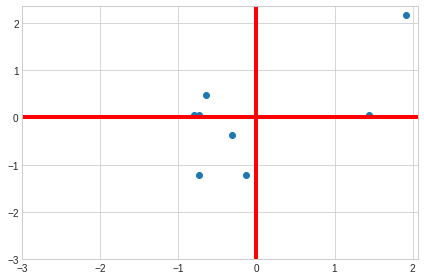

In [14]:
x_std_df = pd.DataFrame(x_std)
with plt.style.context('seaborn-whitegrid'):
  plt.figure()
  plt.scatter(x_std_df.iloc[:,0],x_std_df.iloc[:,1])
  plt.ylim(ymin=-3)
  plt.xlim(xmin=-3)
  plt.axhline(linewidth=4, color='r')
  plt.axvline(linewidth=4, color='r')
  plt.tight_layout()
  plt.show()

In [15]:
mean_vec = np.mean(x_std, axis=0)
cov_mat = (x_std - mean_vec).T.dot((x_std - mean_vec)) / (x_std.shape[0]-1)
print('Covariance matrix \n {}'.format(cov_mat))

Covariance matrix 
 [[ 1.14285714  0.71654435  0.44051839 ...  0.77451916  0.60641192
   0.61280261]
 [ 0.71654435  1.14285714 -0.01421702 ...  0.98248577  0.84781967
   0.70982346]
 [ 0.44051839 -0.01421702  1.14285714 ... -0.18539591  0.48825703
   0.56176744]
 ...
 [ 0.77451916  0.98248577 -0.18539591 ...  1.14285714  0.69043502
   0.65489372]
 [ 0.60641192  0.84781967  0.48825703 ...  0.69043502  1.14285714
   1.06052883]
 [ 0.61280261  0.70982346  0.56176744 ...  0.65489372  1.06052883
   1.14285714]]


In [0]:
# NOT RUNNING IT BECAUSE IT TAKES TOO MUCH TIME
# cov_mat = np.cov(x_std.T)
# eig_vals, eig_vecs = np.linalg.eig(cov_mat)
# print('Eigenvectors \n {}'.format(eig_vecs))
# print('\nEigenvalues \n {}'.format(eig_vals))

In [17]:
# Explained variance with 95% accuracy
pca = PCA(0.95).fit(x_std)
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [0.73135743 0.13774563 0.05513513 0.0354783 ]


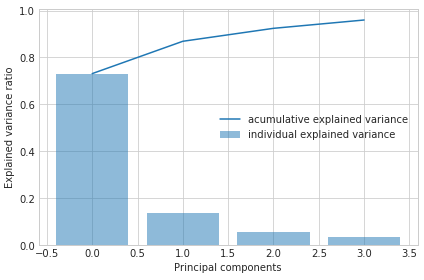

In [18]:
pc_explained = pca.explained_variance_ratio_.tolist()
with plt.style.context('seaborn-whitegrid'):
  plt.figure(figsize=(6, 4))

  plt.bar(range(len(pc_explained)), pc_explained, alpha=0.5, align='center',
          label='individual explained variance')
  plt.plot(range(len(pc_explained)), np.cumsum(pc_explained),
            label='acumulative explained variance')

  plt.ylabel('Explained variance ratio')
  plt.xlabel('Principal components')
  plt.legend(loc='best')
  plt.tight_layout()

In [19]:
pca = PCA(n_components=2).fit(x_std)
x_pca = pca.transform(x_std)
x_pca.shape

(8, 2)

In [20]:
df_pca = pd.DataFrame(data = x_pca
             , columns = ['principal component 1', 'principal component 2'])
df_pca.tail()

,principal component 1,principal component 2
3,-105.873653,-32.613236
4,56.854967,72.057560
5,57.112703,89.378410
6,171.292590,-66.149327
7,156.155044,-30.872888


In [21]:
# Explained variance with 85% accuracy
pca = PCA(0.85).fit(x_std)
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [0.73135743 0.13774563]


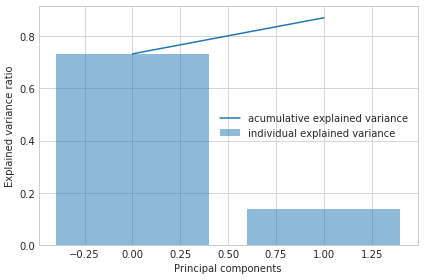

In [22]:
pc_explained = pca.explained_variance_ratio_.tolist()
with plt.style.context('seaborn-whitegrid'):
  plt.figure(figsize=(6, 4))

  plt.bar(range(len(pc_explained)), pc_explained, alpha=0.5, align='center',
          label='individual explained variance')
  plt.plot(range(len(pc_explained)), np.cumsum(pc_explained),
            label='acumulative explained variance')

  plt.ylabel('Explained variance ratio')
  plt.xlabel('Principal components')
  plt.legend(loc='best')
  plt.tight_layout()

In [23]:
df_pca = pd.DataFrame(data = x_pca
             , columns = ['principal component 1', 'principal component 2'])
df_pca.tail()

,principal component 1,principal component 2
3,-105.873653,-32.613236
4,56.854967,72.057560
5,57.112703,89.378410
6,171.292590,-66.149327
7,156.155044,-30.872888
